<h1>OCD Project</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Upload and Clean SurveyI SurveyII SurveyII</b>

In [2]:
TextFileReader1 = pd.read_csv('..\SurveyI.csv',error_bad_lines=False,chunksize=1000)

df1List = []
for df in TextFileReader1:
    df1List.append(df)
    
df1 = pd.concat(df1List,sort=False)
df1 = df1.replace(' ',-1)
df1 = df1.astype('int64',errors='ignore')
df1 = df1.apply(lambda x: x.astype('int64',errors='ignore'))
df1 = df1.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [3]:
TextFileReader2 = pd.read_csv('..\SurveyII.csv',error_bad_lines=False,chunksize=1000)

dfList2 = []
for df in TextFileReader2:
    dfList2.append(df)
    
df2 = pd.concat(dfList2,sort=False)
df2 = df2.replace(' ',-1)
df2 = df2.astype('int64',errors='ignore')
df2 = df2.apply(lambda x: x.astype('int64',errors='ignore'))
df2 = df2.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [4]:
TextFileReader3 = pd.read_csv('..\SurveyIII.csv',error_bad_lines=False,chunksize=1000)

dfList3 = []
for df in TextFileReader3:
    dfList3.append(df)
    
df3 = pd.concat(dfList3,sort=False)
df3 = df3.replace(' ',-1)
df3 = df3.astype('int64',errors='ignore')
df3 = df3.apply(lambda x: x.astype('int64',errors='ignore'))
df3 = df3.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

<h4>Counts of People reported to have OCD</h2>

In [5]:
print("Survey I")
print(df1['NQ31B1'].value_counts())
print("Survey II")
print(df2['NQ31B1'].value_counts())
print("Survey III")
print(df3['NQ31B1'].value_counts())

Survey I
 1    366332
-1      5616
 2      3123
 3      1604
 5      1494
 4      1061
 6       354
Name: NQ31B1, dtype: int64
Survey II
 1    482168
-1      7300
 2      4972
 5      2215
 3      2160
 4      1573
 6       472
Name: NQ31B1, dtype: int64
Survey III
 1    342893
-1      4814
 2      4695
 3      2035
 5      1976
 4      1665
 6       375
Name: NQ31B1, dtype: int64


<h4>Removing Data Points with implausible height weight and BMI</h4>

In [6]:
df1['NQ49'] = df1.NQ49_FT * 12 + df1.NQ49_IN

In [7]:
df1_bool = ((df1['NQ49'] >= 47.2441) & (df1['NQ49'] <= 82.6772) & (df1['NQ50'] >= 77.16) & (df1['NQ50'] <= 396.832) & (df1['BMI'] >= 16) & (df1['BMI'] <= 65))
print("Data before trim: " + str(len(df1)))
print("Data after trim: " + str(len(df1[df1_bool])))
df1 = df1[df1_bool]

Data before trim: 379584
Data after trim: 363940


In [8]:
df2_bool = ((df2['NQ49'] >= 47.2441) & (df2['NQ49'] <= 82.6772) & (df2['NQ50'] >= 77.16) & (df2['NQ50'] <= 396.832) & (df2['BMI'] >= 16) & (df2['BMI'] <= 65))
print("Data before trim: " + str(len(df2)))
print("Data after trim: " + str(len(df2[df2_bool])))
df2 = df2[df2_bool]

Data before trim: 500860
Data after trim: 482185


In [9]:
df3_bool = ((df3['NQ49'] >= 47.2441) & (df3['NQ49'] <= 82.6772) & (df3['NQ50'] >= 77.16) & (df3['NQ50'] <= 396.832) & (df3['BMI'] >= 16) & (df3['BMI'] <= 65))
print("Data before trim: " + str(len(df3)))
print("Data after trim: " + str(len(df3[df3_bool])))
df3 = df3[df3_bool]

Data before trim: 358453
Data after trim: 335756


<h4>Merge Data Frames</h4>

In [10]:
data_ocd = pd.concat([df1,df2,df3],axis=0,sort = True)

<h4>Total size of Data Before Trimming</h4>

In [11]:
data_ocd.shape

(1181881, 185)

<h4>After Trim</h4>

In [12]:
data_ocd.shape

(1181881, 185)

<h4>Delete Unanswered Responses</h4>

In [13]:
data_ocd = data_ocd[data_ocd['NQ31B1'] != -1]

<h4>Total survey results</h4>

In [14]:
data_ocd['NQ31B1'].value_counts()

1    1147667
2      12085
3       5440
5       5387
4       4061
6       1027
Name: NQ31B1, dtype: int64

<h4>After Deleting Unanswered Responses</h4>

In [15]:
data_ocd.shape

(1175667, 185)

<h4>Create Label for Plot</h4>

In [16]:
label_ = []
k = 0
j = 2008
for i in range(18,39):
    if(k == 0):
        label_.append("Fall" + str(j))
        k = 1
        j += 1
    else:
        label_.append("Spring" + str(j))
        k = 0
        
label_

['Fall2008',
 'Spring2009',
 'Fall2009',
 'Spring2010',
 'Fall2010',
 'Spring2011',
 'Fall2011',
 'Spring2012',
 'Fall2012',
 'Spring2013',
 'Fall2013',
 'Spring2014',
 'Fall2014',
 'Spring2015',
 'Fall2015',
 'Spring2016',
 'Fall2016',
 'Spring2017',
 'Fall2017',
 'Spring2018',
 'Fall2018']

<h4>OCD Rate Between Terms</h4>

In [17]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value*100)
        #label = str(label * 100) + "%"
        
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for


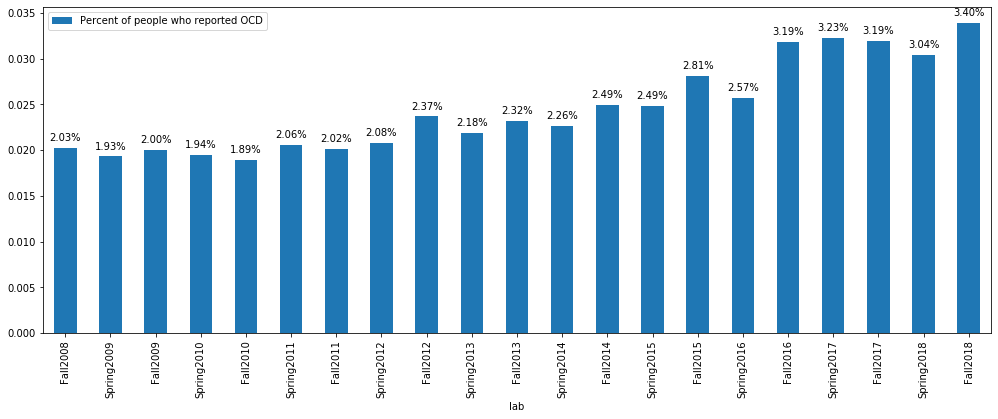

In [18]:
def plot_ocd_ratio(data_ocd):  
    
    ratio = []
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        ratio.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))

    ocd_plot = pd.DataFrame({'lab':label_, 'val':ratio})
    #plt.bar(ocd_plot,label="Percent of people who reported OCD",figsize=(18,6))
    ax = ocd_plot.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4")
    add_value_labels(ax)
    
    return ocd_plot, ratio

ocd_plot, ratio = plot_ocd_ratio(data_ocd)

<h1>Update: From here</h1>

<h2>Curve Fitting</h2>

In [19]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

slope = trendline(pd.Series(ocd_plot['val']))
print(slope)

0.00074248406443892


In [20]:
term = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
curve = pd.DataFrame({'lab':term, 'val':ratio})

Exponential Curve Fitting

array([-3.61484924e+02,  2.05403252e-06,  3.61502018e+02])

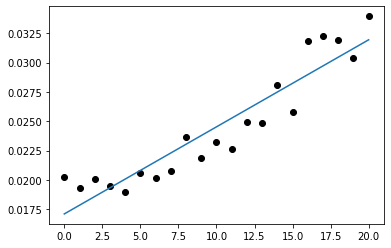

In [21]:
from pylab import *
from scipy.optimize import curve_fit
def func(x, a, c, d):
    return a*np.exp(-c*x)+d
def func2(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func, term, ratio, p0=(1, 1e-6, 1))
xx = np.linspace(0, 20,1000)
yy = func(xx, *popt)
plt.plot(term,ratio,'ko')
plt.plot(xx, yy)
popt

Linear Regression

array([0.00074248, 0.01709479])

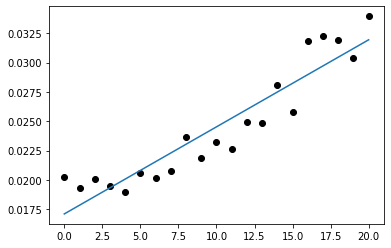

In [22]:
def func2(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func2, term, ratio, p0=(1, 2))
xx = np.linspace(0, 20,1000)
yy = func2(xx, *popt)
plt.plot(term,ratio,'ko')
plt.plot(xx, yy)
popt

Conclusion: A linear fit seems like the correct fit to use

In [30]:
import statsmodels.api as sm
curve['intercept']=1
lm=sm.OLS(curve['val'],curve[['intercept','lab']])
slr_results = lm.fit()
slr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           9.51e-10
Time:                        13:13:10   Log-Likelihood:                 103.33
No. Observations:                  21   AIC:                            -202.7
Df Residuals:                      19   BIC:                            -200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0171      0.001     21.867      0.000       0.015       0.019
lab            0.0007   6.69e-05     11.103      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.344   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                1.496
Skew:                           0.271   Prob(JB):                        0.473
Kurtosis:                       1.810   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0: B = 0 Year has no effect on OCD rates. 

H1: B > 0 Year has positive linear relationship with OCD rates. 

The p value for the is very small. For a one sided test 

<h2>Dickey-Fuller test</h2>

Ho: Time series is non-stationary

H1: Time series is stationary

In [31]:
from statsmodels.tsa.stattools import adfuller

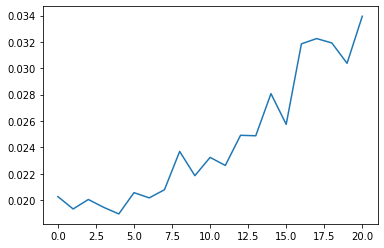

In [39]:
plt.plot(curve['val'])

In [38]:
X = curve['val'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time series is Non-Stationary")

ADF Statistic: 1.958793
p-value 0.998617
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Failed to Reject Ho - Time series is Non-Stationary


<h1> Update: Up to Here </h1>

<h4>Stacked Bar Chart</h4>

In [23]:
data_ocd['Treated'] = 2
data_ocd.loc[data_ocd['NQ31B1'] == -1,'Treated'] = 0
data_ocd.loc[data_ocd['NQ31B1'] == 1,'Treated'] = 0
data_ocd.loc[data_ocd['NQ31B1'] == 2,'Treated'] = 1
data_ocd.Treated.value_counts()

0    1147667
2      15915
1      12085
Name: Treated, dtype: int64

In [24]:
study_value = data_ocd['STUDY'].value_counts(sort=False)
pivot_df = data_ocd[data_ocd.Treated != 0].pivot_table(index = ['STUDY'],columns=['Treated'],aggfunc = 'size',observed=True)
pivot_df = pivot_df.div(study_value,axis=0)
pivot_df = pivot_df.multiply(100)

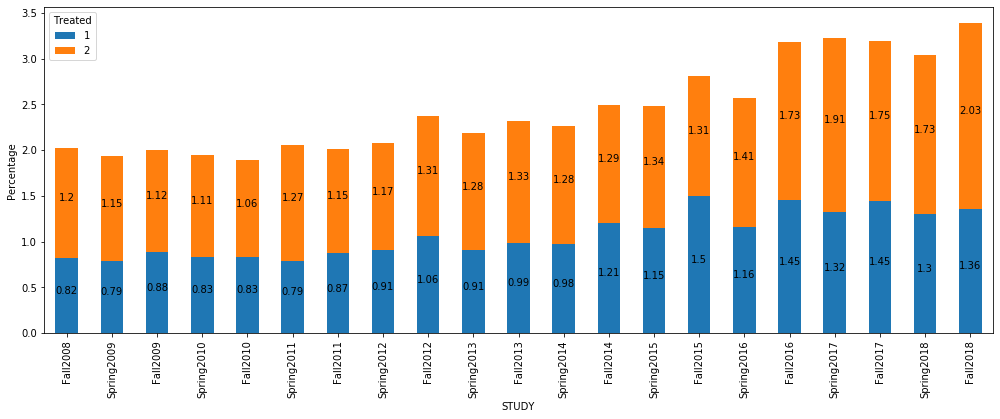

In [26]:
ax = pivot_df.plot.bar(stacked=True,figsize=(17,6))
ax.set_xticklabels(label_)
ax.set_ylabel("Percentage")
height_prev = np.zeros(21)
#print(len(height_prev))
#print(height_prev)
patch = 0
for i in range(1,3):
    #print(height_prev)
    j = 0
    for rec, label in zip(ax.patches,pivot_df[i].round(2).astype(str)): 
        #print(rec)
        height = rec.get_height()
        height = ax.patches[patch].get_height()
        #print(height,height_prev[j],(height/2 + height_prev[j]))
        ax.text(rec.get_x() + rec.get_width() / 2, (height/2 + height_prev[j]), label,
               ha = 'center', va='bottom')
        #print(height,height_prev[j])
        height_prev[j] = height + height_prev[j]
        j += 1
        patch += 1

ax.set_xticklabels(label_);

In [ ]:
study_value = data_ocd['STUDY'].value_counts(sort=False)

In [ ]:
pivot_df = data_ocd[data_ocd.NQ31B1 != 1].pivot_table(index = ['STUDY'],columns=['NQ31B1'],aggfunc = 'size',observed=True)

In [ ]:
pivot_df = pivot_df.div(study_value,axis=0)

In [ ]:
pivot_df = pivot_df.multiply(100)

In [ ]:
ax = pivot_df.plot.bar(stacked=True,figsize=(17,6))
ax.set_xticklabels(label)
ax.set_ylabel("Percentage")
height_prev = np.zeros(21)
#print(len(height_prev))
#print(height_prev)
patch = 0
for i in range(2,7):
    #print(height_prev)
    j = 0
    for rec, label in zip(ax.patches,pivot_df[i].round(2).astype(str)): 
        #print(rec)
        height = rec.get_height()
        height = ax.patches[patch].get_height()
        #print(height,height_prev[j],(height/2 + height_prev[j]))
        ax.text(rec.get_x() + rec.get_width() / 2, (height/2 + height_prev[j]), label,
               ha = 'center', va='bottom')
        #print(height,height_prev[j])
        height_prev[j] = height + height_prev[j]
        j += 1
        patch += 1


ax.set_xticklabels(label_);

<h4>OCD Report By Year</h4>

In [ ]:
label_year = []
for i in range(2008,2019):
    label_year.append(i)
label_year

In [ ]:
def ocd_year(data_ocd):  
    
    ratio = []
    temp_prevalence = 0
    temp_length = 0
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        temp_prevalence += data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() 
        temp_length += len(data.NQ31B1)
        if(answer % 2 == 0):
            ratio.append(temp_prevalence * 1.0 / temp_length)
            temp_prevalence = 0
            temp_length = 0

    ocd_plot = pd.DataFrame({'lab':label_year, 'val':ratio})
    #plt.bar(ocd_plot,label="Percent of people who reported OCD",figsize=(18,6))
    ax = ocd_plot.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4")
    add_value_labels(ax)

ocd_year(data_ocd)

<h4>Seasonal Trends</h4>

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 20))

def ocd_year(data_ocd):  
    
    ratio_Fall = []
    ratio_Spring = []
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        if(answer % 2 == 0): # Fall
            ratio_Fall.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))
        else:
            ratio_Spring.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))
    
    plot_fall = pd.DataFrame({'lab':label[::2], 'val':ratio_Fall})
    plot_fall.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4", ax = axes[0])
    add_value_labels(axes[0])
    
    label_Spring = label[1::2]
    label_Spring.insert(0,"")
    ratio_Spring.insert(0,0)
    plot_spring = pd.DataFrame({'lab':label_Spring, 'val':ratio_Spring})
    plot_spring.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4", ax = axes[1])
    add_value_labels(axes[1])
    fig.tight_layout()
    
ocd_year(data_ocd)

<b>Graph of responses per year</b>

In [ ]:
fig, axes = plt.subplots(3, 7, figsize=(15, 6))
i = 0
j = 0
for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['STUDY'] == answer)]
    data = data.groupby(['NQ31B1']).STUDY.sum()
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[j,i].bar(left,right,label= (label[7*j + i]),log=True)
    axes[j,i].set_xticks(left, minor=False)
    axes[j,i].set_xticklabels(data.index.values)
    axes[j,i].legend(loc='best')
    if(i == 6):
        i = 0
        j += 1
    else:
        i += 1
    

<h4>Graph Percentages of responses by year</h4>

In [ ]:
fig, axes = plt.subplots(3, 7, figsize=(15, 6))
i = 0
j = 0
for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['STUDY'] == answer)]
    data = data.groupby(['NQ31B1']).STUDY.sum() / sum(data.groupby(['NQ31B1']).STUDY.sum()) * 100
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[j,i].bar(left,right,label= (label[7*j + i]))
    axes[j,i].set_xticks(left, minor=False)
    axes[j,i].set_xticklabels(data.index.values)
    axes[j,i].legend(loc='best')
    axes[j,i].set_ylim(0,3)
    if(i == 6):
        i = 0
        j += 1
    else:
        i += 1
    

<h4>Drop all columns that aren't in all the datasets</h4>

In [ ]:
data_ocd = data_ocd.dropna(axis=1)

In [ ]:
data_ocd.info()